In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings("ignore")
%matplotlib inline

##### Locading the four datasets

In [36]:
df_order_details = pd.read_csv(r"C:\Users\Yormee\Dev\TechCrush_folder\Pizza+Place+Sales\pizza_sales\order_details.csv")
df_order_details.head()

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1


In [37]:
df_orders = pd.read_csv(r"C:\Users\Yormee\Dev\TechCrush_folder\Pizza+Place+Sales\pizza_sales\orders.csv")
df_orders.head()

,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30


In [38]:
df_pizza = pd.read_csv(r"C:\Users\Yormee\Dev\TechCrush_folder\Pizza+Place+Sales\pizza_sales\pizzas.csv")
df_pizza.head()

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75


In [39]:
df_pizza_types = pd.read_csv(r"C:\Users\Yormee\Dev\TechCrush_folder\Pizza+Place+Sales\pizza_sales\pizza_types.csv", encoding="latin1")
df_pizza_types.head()

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."


###### Merging the order_details dataframe and the orders dataframe


In [40]:
orders_df = pd.merge(df_order_details, df_orders, on="order_id", how="left")
orders_df.head()

,order_details_id,order_id,pizza_id,quantity,date,time
0,1,1,hawaiian_m,1,2015-01-01,11:38:36
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40
2,3,2,five_cheese_l,1,2015-01-01,11:57:40
3,4,2,ital_supr_l,1,2015-01-01,11:57:40
4,5,2,mexicana_m,1,2015-01-01,11:57:40


###### Merging the pizza dataframe and the pizza_types dataframe

In [41]:
pizza_df = pd.merge(df_pizza, df_pizza_types, on="pizza_type_id", how="left")
pizza_df.head()

,pizza_id,pizza_type_id,size,price,name,category,ingredients
0,bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,bbq_ckn_m,bbq_ckn,M,16.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
2,bbq_ckn_l,bbq_ckn,L,20.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
3,cali_ckn_s,cali_ckn,S,12.75,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
4,cali_ckn_m,cali_ckn,M,16.75,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."


### Combining the all the four datagrames i.e (Orders, Order Details, Pizza, and pizaa_types)

In [42]:
combined_df = pd.merge(orders_df, pizza_df, on="pizza_id", how="left")
combined_df.head()

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go..."
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni..."
4,5,2,mexicana_m,1,2015-01-01,11:57:40,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."


In [43]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_details_id  48620 non-null  int64  
 1   order_id          48620 non-null  int64  
 2   pizza_id          48620 non-null  object 
 3   quantity          48620 non-null  int64  
 4   date              48620 non-null  object 
 5   time              48620 non-null  object 
 6   pizza_type_id     48620 non-null  object 
 7   size              48620 non-null  object 
 8   price             48620 non-null  float64
 9   name              48620 non-null  object 
 10  category          48620 non-null  object 
 11  ingredients       48620 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 4.5+ MB


In [44]:
#creating the sale column from the quantity and the price
combined_df["sales"] = combined_df["quantity"] * combined_df["price"]
combined_df

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients,sales
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",13.25
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",16.00
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",18.50
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",20.75
4,5,2,mexicana_m,1,2015-01-01,11:57:40,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",16.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,2015-12-31,21:23:10,ckn_alfredo,M,16.75,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",16.75
48616,48617,21348,four_cheese_l,1,2015-12-31,21:23:10,four_cheese,L,17.95,The Four Cheese Pizza,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",17.95
48617,48618,21348,napolitana_s,1,2015-12-31,21:23:10,napolitana,S,12.00,The Napolitana Pizza,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",12.00
48618,48619,21349,mexicana_l,1,2015-12-31,22:09:54,mexicana,L,20.25,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",20.25


###### 1 - The Total Revenue/Sales - 

In [45]:
combined_df['sales'].sum()

817860.05

###### 2 - The Total quantity Sold

In [46]:
combined_df["quantity"].sum()

49574

###### 3 - Total orders

In [47]:
combined_df["order_id"].count()

48620

###### 4 - Pizza types they sell

In [48]:
combined_df["pizza_type_id"].unique()

array(['hawaiian', 'classic_dlx', 'five_cheese', 'ital_supr', 'mexicana',
       'thai_ckn', 'prsc_argla', 'bbq_ckn', 'the_greek', 'spinach_supr',
       'green_garden', 'ital_cpcllo', 'spicy_ital', 'spin_pesto',
       'veggie_veg', 'southw_ckn', 'cali_ckn', 'pepperoni', 'ckn_pesto',
       'big_meat', 'soppressata', 'four_cheese', 'napolitana',
       'calabrese', 'ital_veggie', 'mediterraneo', 'peppr_salami',
       'spinach_fet', 'sicilian', 'ckn_alfredo', 'pep_msh_pep',
       'brie_carre'], dtype=object)

In [49]:
## The number of pizza types they sell
len(combined_df["pizza_type_id"].unique())

32

Total number of pizza types they sell is 32

###### 5 - The average price of the pizzas

In [50]:
combined_df["price"].mean()

16.494132044426163

###### 6 - Peak hours of sales?

In [51]:
combined_df.duplicated().sum() ##checking duplicates

0

In [52]:
combined_df["time"] = pd.to_datetime(combined_df["time"])

In [53]:
combined_df["hour"] = combined_df["time"].dt.hour
combined_df.head()

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients,sales,hour
0,1,1,hawaiian_m,1,2015-01-01,2025-09-25 11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",13.25,11
1,2,2,classic_dlx_m,1,2015-01-01,2025-09-25 11:57:40,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",16.00,11
2,3,2,five_cheese_l,1,2015-01-01,2025-09-25 11:57:40,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",18.50,11
3,4,2,ital_supr_l,1,2015-01-01,2025-09-25 11:57:40,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",20.75,11
4,5,2,mexicana_m,1,2015-01-01,2025-09-25 11:57:40,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",16.00,11


In [54]:
#grouping based on the sales related to the hours
peak_hour_of_sales = combined_df.groupby("hour")["sales"].max().reset_index()  #these are the pick hours of sales 
peak_hour_of_sales.sort_values(by="sales", ascending=False, inplace=True)
peak_hour_of_sales

,hour,sales
5,14,83.00
3,12,62.25
4,13,55.50
8,17,51.00
9,18,51.00
12,21,49.50
2,11,47.30
7,16,47.30
6,15,41.50
10,19,41.50


Peak hour of sales ranging from the highest sales to the smallest corresponding to the hours.

###### 7 - Total Sales made on each day of the week 

In [55]:
combined_df["date"] = pd.to_datetime(combined_df["date"])
combined_df["day_of_week"] = combined_df["date"].dt.day_name()
combined_df.head()

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients,sales,hour,day_of_week
0,1,1,hawaiian_m,1,2015-01-01,2025-09-25 11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",13.25,11,Thursday
1,2,2,classic_dlx_m,1,2015-01-01,2025-09-25 11:57:40,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",16.00,11,Thursday
2,3,2,five_cheese_l,1,2015-01-01,2025-09-25 11:57:40,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",18.50,11,Thursday
3,4,2,ital_supr_l,1,2015-01-01,2025-09-25 11:57:40,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",20.75,11,Thursday
4,5,2,mexicana_m,1,2015-01-01,2025-09-25 11:57:40,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",16.00,11,Thursday


In [56]:
daily_sales = combined_df.groupby("day_of_week")["sales"].sum().reset_index()
daily_sales.sort_values(by="sales", ascending=False)
daily_sales

,day_of_week,sales
0,Friday,136073.90
1,Monday,107329.55
2,Saturday,123182.40
3,Sunday,99203.50
4,Thursday,123528.50
5,Tuesday,114133.80
6,Wednesday,114408.40


In [57]:
daily_sales.loc[daily_sales["sales"].idxmax()].T

day_of_week      Friday
sales          136073.9
Name: 0, dtype: object

Friday is the day of the week that sales are made the most.

###### 8 - Top 5 best selling pizzas

In [58]:
top_5_best_selling_pizza = combined_df.groupby("name")["quantity"].sum().sort_values(ascending=False).reset_index()
top_5_best_selling_pizza.head(5)

,name,quantity
0,The Classic Deluxe Pizza,2453
1,The Barbecue Chicken Pizza,2432
2,The Hawaiian Pizza,2422
3,The Pepperoni Pizza,2418
4,The Thai Chicken Pizza,2371


The best selling pizza is The Classic Deluxe Pizza

###### 9 - Sales made in each month

In [59]:
combined_df["month_name"] = combined_df["date"].dt.month_name()
combined_df.head()

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients,sales,hour,day_of_week,month_name
0,1,1,hawaiian_m,1,2015-01-01,2025-09-25 11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",13.25,11,Thursday,January
1,2,2,classic_dlx_m,1,2015-01-01,2025-09-25 11:57:40,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",16.00,11,Thursday,January
2,3,2,five_cheese_l,1,2015-01-01,2025-09-25 11:57:40,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",18.50,11,Thursday,January
3,4,2,ital_supr_l,1,2015-01-01,2025-09-25 11:57:40,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",20.75,11,Thursday,January
4,5,2,mexicana_m,1,2015-01-01,2025-09-25 11:57:40,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",16.00,11,Thursday,January


In [60]:
# getting my month name in order to groupy month
monthly_sales = combined_df.groupby("month_name")["sales"].sum().reset_index()
monthly_sales.sort_values(by="sales", ascending=True, inplace=True)
monthly_sales

,month_name,sales
10,October,64027.60
11,September,64180.05
2,December,64701.15
3,February,65159.60
6,June,68230.20
1,August,68278.25
0,April,68736.80
4,January,69793.30
9,November,70395.35
7,March,70397.10


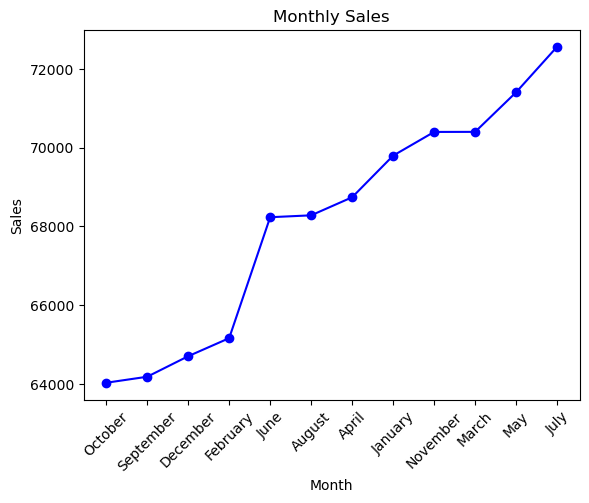

In [61]:
#plotting the sales per month to see the trend
plt.plot(monthly_sales["month_name"], monthly_sales["sales"], color="Blue", marker="o")  ##line plot
plt.title("Monthly Sales")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.xticks(rotation=45)  # to avoid overlaping of month
# plt.figure(figsize=(10, 6))
plt.show()

I observed that, sales in the month of July was high compared to October

###### 10 - Pizza types that are not doing well.


In [62]:
pizzas_not_doing_well = combined_df.groupby("name")["quantity"].sum().reset_index()
pizzas_not_doing_well.sort_values(by="quantity", ascending=True).head(10)

,name,quantity
2,The Brie Carre Pizza,490
16,The Mediterranean Pizza,934
3,The Calabrese Pizza,937
28,The Spinach Supreme Pizza,950
24,The Soppressata Pizza,961
27,The Spinach Pesto Pizza,970
6,The Chicken Pesto Pizza,973
15,The Italian Vegetables Pizza,981
5,The Chicken Alfredo Pizza,987
11,The Green Garden Pizza,997


The Brie Carre Pizza is the only pizza type not doing well on the menu

In [63]:
combined_df.head()

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients,sales,hour,day_of_week,month_name
0,1,1,hawaiian_m,1,2015-01-01,2025-09-25 11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",13.25,11,Thursday,January
1,2,2,classic_dlx_m,1,2015-01-01,2025-09-25 11:57:40,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",16.00,11,Thursday,January
2,3,2,five_cheese_l,1,2015-01-01,2025-09-25 11:57:40,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",18.50,11,Thursday,January
3,4,2,ital_supr_l,1,2015-01-01,2025-09-25 11:57:40,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",20.75,11,Thursday,January
4,5,2,mexicana_m,1,2015-01-01,2025-09-25 11:57:40,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",16.00,11,Thursday,January


### Further Exploration on the Dataset

###### Sizes of pizza that sells the most

In [64]:
pizza_size = combined_df.groupby("size")['quantity'].count().reset_index()
pizza_size

,size,quantity
0,L,18526
1,M,15385
2,S,14137
3,XL,544
4,XXL,28


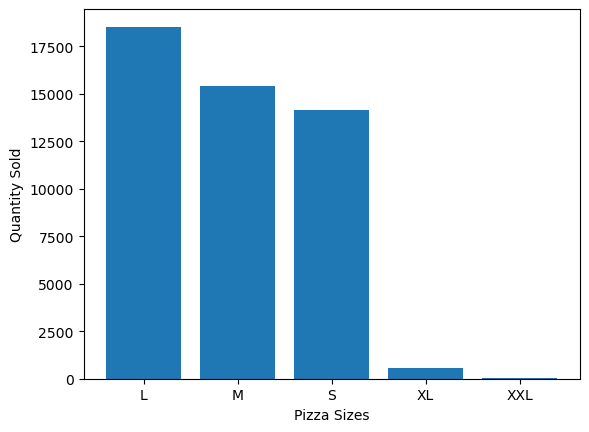

In [65]:
plt.bar(pizza_size['size'], pizza_size['quantity'])
plt.xlabel("Pizza Sizes")
plt.ylabel("Quantity Sold")
plt.show()

The large pizza size gets more attention than the rest.

###### Category of pizza that sells the most

In [66]:
category = combined_df.groupby(["category"])["quantity"].count().reset_index()
category.sort_values(by="quantity", ascending=False)

,category,quantity
1,Classic,14579
2,Supreme,11777
3,Veggie,11449
0,Chicken,10815


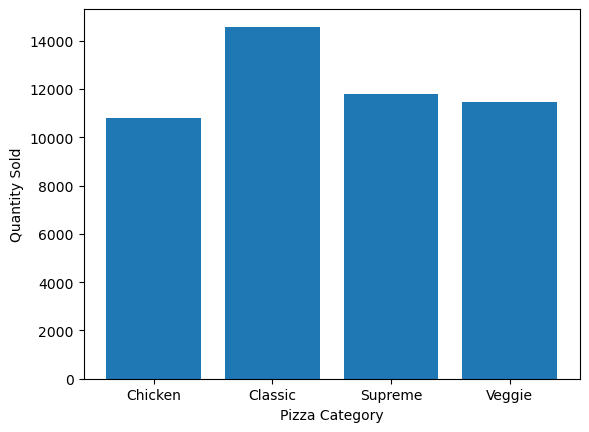

In [67]:
plt.bar(category['category'], category['quantity'])
plt.xlabel("Pizza Category")
plt.ylabel("Quantity Sold")
plt.show()

The Classic category is the most selling pizza

###### Pizza Types being ordered for the most

In [68]:
most_ordered_pizza = combined_df.groupby("name")["order_id"].count().reset_index()
most_ordered_pizza.sort_values(by="order_id", ascending=False, inplace=True)
most_ordered_pizza

,name,order_id
7,The Classic Deluxe Pizza,2416
0,The Barbecue Chicken Pizza,2372
12,The Hawaiian Pizza,2370
20,The Pepperoni Pizza,2369
30,The Thai Chicken Pizza,2315
4,The California Chicken Pizza,2302
26,The Spicy Italian Pizza,1887
23,The Sicilian Pizza,1887
25,The Southwest Chicken Pizza,1885
9,The Four Cheese Pizza,1850


This also confirms that the Classic category of pizza is the most selling pizza - (The Classic Deluxe Pizza)